<a href="https://colab.research.google.com/github/marimcmurtrie/NLP/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Natural Language Processing

NLP frames language and linguistic interactions within a computational perspective. This makes possible the development of algorithms and models capable of natural language understanding and natural language generation.

The applications include document proofreading (spelling & grammar), word prediction, information retrieval, text classification, text summarization, question answering, information extraction, machine translation, sentiment analysis, optical character recognition, speech recognition etc.

We will explore a few core concepts in NLP.
* Text Classification
* Information Retrieval

## Import basic packages

In [ ]:
import pickle # Needed to load and save data
import numpy as np # Needed for numerical computations
import pandas as pd # We will use this for formatting and displaying data
import matplotlib.pyplot as plt # Needed for generating graphics
import nltk # Natural Language Tool Kit
nltk.download('punkt') #One time download
nltk.download('stopwords') #One time download

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

***What's with all these imports?***

Python programming practice upholds code reusability. It is very tedious (impossible, I would say) to compose software entirely from scratch, without building on code written by others. But for the existence of packages to import, we can only dream about writing programs to do complex tasks, constantly reinventing the wheel. We must embrace the **DRY** principle ("Don't repeat yourself") of software development aimed at reducing repetition of software patterns. Violating this principle would lead to **WET** solutions ("write every time", "write everything twice", "we enjoy typing" or "waste everyone's time")

## Working with text data

### Import Data

We have about 5000 pieces of text data available for training. The data is "pickled" in the file Webinar_06-09-2020.pkl. (Make sure you place this file in the same directory as this notebook.) Each piece of text data is associated with a Category. Take a look at a few random samples of the data:

<pre>
Commerce    London School of Commerce is an associate college of the University of Wales Trinity Saint David...
Commerce    The Protection of Lawful Commerce in Arms Act (PLCAA) is a United States law that protects firea...
Astronomy   Heliocentrism is the astronomical model in which the Earth and planets revolve around the Sun at...
Religion    Greco-Roman religion may refer to:\r\n\r\nAncient Greek religion\r\nHellenistic religion\r\nMyst...
Literature  Iranian literature, or Iranic literature, refers to the literary traditions of the Iranian langu...
Literature                                  This is a list of some of the standards of concert band repertoire.
Cosmology   The Centre for Theoretical Cosmology is a research centre within the Department of Applied Mathe...
Art         Indigenous Australian art includes art made by Aboriginal Australian and Torres Strait Islander ...
Religion    The status of religious freedom around the world varies from country to country. States can diff...
Evolution   Evolution is the fourth studio album by American R&B quartet Boyz II Men, released in September ...
</pre>

In [ ]:
data_file = 'NLP_len_5000.pkl'

In [ ]:
with open(data_file, 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.shape # There are 4991 samples of data. Each sample is of the form [Category, Text]

(3344, 2)

In [ ]:
rng = np.random.default_rng(0) # Try changing the random seed to get a different selection

random_selection = rng.integers(len(data), size=10)

with pd.option_context('display.max_colwidth', 100):
    df = pd.DataFrame(data[random_selection,1], index=data[random_selection,0])
    print(df)

                                                                                                              0
Philosophy  Early Islamic philosophy or classical Islamic philosophy is a period of intense philosophical de...
Evolution   The neocortex, also called the neopallium, isocortex, or the six-layered cortex, is a set of lay...
Economics   This is a list of Ig Nobel Prize winners from 1991 to the present day.\nA parody of the Nobel Pr...
Commerce    Commerce Square is a Class-A, high-rise office building complex in Center City Pennsylvania. Com...
Commerce    The Baylor University Chamber of Commerce, also called Chamber of Commerce, Baylor Chamber, or s...
Art         NSCAD University, also known as the Nova Scotia College of Art and Design (NSCAD), is a public a...
Art         The Chen Clan Ancestral Hall or Chen Clan Academy is an academic temple in Guangzhou, China, bui...
Art         The Royal Academy of Dramatic Art, also known by its abbreviation RADA (), is a drama school

***How many distinct categories are there? How many entries in each category? Let's find out!***

In [ ]:
(unique_categories, category_counts) = np.unique(data[:,0], return_counts=True)

In [ ]:
pd.DataFrame({'Category':unique_categories, 'Count':category_counts})

,Category,Count
0,Art,299
1,Astronomy,279
2,Biology,314
3,Commerce,219
4,Cosmology,420
5,Economics,333
6,Evolution,372
7,Literature,346
8,Philosophy,370
9,Religion,392


This data will be used to demonstrate the following:
* Text Classification: We will build a classifier that can accept a piece of text and determine the category
* Information Retrieval: We will see how to retrieve articles similar to a given article (or given set of keywords)

### Preprocessing

In [ ]:
from nltk.tokenize import word_tokenize

#### Tokenize, filter stopwords

Tokenization simply means, convert this:
<pre>
In biological classification, class (Latin: classis) is  a taxonomic rank, as well as a taxonomic unit, a taxon, in that rank. Other well-known ranks in descending order of size are life, domain, kingdom, phylum, order, family, genus, and species, with class fitting between phylum and order.
</pre>
to this:
<pre>
['In', 'biological', 'classification', ',', 'class', '(', 'Latin', ':', 'classis', ')', 'is', 'a', 'taxonomic', 'rank', ',', 'as', 'well', 'as', 'a', 'taxonomic', 'unit', ',', 'a', 'taxon', ',', 'in', 'that', 'rank', '.', 'Other', 'well-known', 'ranks', 'in', 'descending', 'order', 'of', 'size', 'are', 'life', ',', 'domain', ',', 'kingdom', ',', 'phylum', ',', 'order', ',', 'family', ',', 'genus', ',', 'and', 'species', ',', 'with', 'class', 'fitting', 'between', 'phylum', 'and', 'order', '.']
</pre>

In [ ]:
documents_tokenized = []
for doc in data[:,1]:
    documents_tokenized.append(word_tokenize(doc))

Let's check

In [ ]:
print(data[15,1])

The Museum of Modern Art (MoMA) is an art museum located in Midtown Manhattan, New York City, on 53rd Street between Fifth and Sixth Avenues. The institution was conceived in 1929 by Abby Aldrich Rockefeller, Lillie P. Bliss, and Mary Quinn Sullivan. Initially located in the Heckscher Building on Fifth Avenue, it opened just days after the Wall Street Crash. The museum, America's first devoted exclusively to modern art, was led by A. Conger Goodyear as president and Abby Rockefeller as treasurer, with Alfred H. Barr Jr. as its first director. Under Barr's leadership, the museum's collection rapidly expanded, beginning with an inaugural exhibition of works by European modernists. Despite financial challenges, including opposition from John D. Rockefeller Jr., the museum moved to several temporary locations in its early years, and John D. Rockefeller Jr. eventually donated the land for its permanent site.
From the 1930s through the 1950s, MoMA gained international recognition with landma

In [ ]:
print(documents_tokenized[15])

['The', 'Museum', 'of', 'Modern', 'Art', '(', 'MoMA', ')', 'is', 'an', 'art', 'museum', 'located', 'in', 'Midtown', 'Manhattan', ',', 'New', 'York', 'City', ',', 'on', '53rd', 'Street', 'between', 'Fifth', 'and', 'Sixth', 'Avenues', '.', 'The', 'institution', 'was', 'conceived', 'in', '1929', 'by', 'Abby', 'Aldrich', 'Rockefeller', ',', 'Lillie', 'P.', 'Bliss', ',', 'and', 'Mary', 'Quinn', 'Sullivan', '.', 'Initially', 'located', 'in', 'the', 'Heckscher', 'Building', 'on', 'Fifth', 'Avenue', ',', 'it', 'opened', 'just', 'days', 'after', 'the', 'Wall', 'Street', 'Crash', '.', 'The', 'museum', ',', 'America', "'s", 'first', 'devoted', 'exclusively', 'to', 'modern', 'art', ',', 'was', 'led', 'by', 'A.', 'Conger', 'Goodyear', 'as', 'president', 'and', 'Abby', 'Rockefeller', 'as', 'treasurer', ',', 'with', 'Alfred', 'H.', 'Barr', 'Jr.', 'as', 'its', 'first', 'director', '.', 'Under', 'Barr', "'s", 'leadership', ',', 'the', 'museum', "'s", 'collection', 'rapidly', 'expanded', ',', 'beginning

Can we find out how many unique tokens there are? Yes we can!

In [ ]:
unique_tokens = set()

In [ ]:
for tokens in documents_tokenized:
    unique_tokens.update(tokens)

In [ ]:
len(unique_tokens)

122355

An important step in the preprocessing chain is to remove all extraneous words containing non-alphabet characters e.g. punctuation and numbers. We will also simplify the problem by reducing all text to lowercase.

In [ ]:
documents_alpha_lower = [[word.lower() for word in words if word.isalpha()] for words in documents_tokenized]

Next we remove all stop words - noninformative words that occur too commonly across documents e.g. the, a, an, of ...

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
documents_stop_filtered = [[word for word in words if (len(word)>2) and (not word in stop_words)] for words in documents_alpha_lower]

In [ ]:
print(documents_stop_filtered[15])

['museum', 'modern', 'art', 'moma', 'art', 'museum', 'located', 'midtown', 'manhattan', 'new', 'york', 'city', 'street', 'fifth', 'sixth', 'avenues', 'institution', 'conceived', 'abby', 'aldrich', 'rockefeller', 'lillie', 'bliss', 'mary', 'quinn', 'sullivan', 'initially', 'located', 'heckscher', 'building', 'fifth', 'avenue', 'opened', 'days', 'wall', 'street', 'crash', 'museum', 'america', 'first', 'devoted', 'exclusively', 'modern', 'art', 'led', 'conger', 'goodyear', 'president', 'abby', 'rockefeller', 'treasurer', 'alfred', 'barr', 'first', 'director', 'barr', 'leadership', 'museum', 'collection', 'rapidly', 'expanded', 'beginning', 'inaugural', 'exhibition', 'works', 'european', 'modernists', 'despite', 'financial', 'challenges', 'including', 'opposition', 'john', 'rockefeller', 'museum', 'moved', 'several', 'temporary', 'locations', 'early', 'years', 'john', 'rockefeller', 'eventually', 'donated', 'land', 'permanent', 'site', 'moma', 'gained', 'international', 'recognition', 'lan

In [ ]:
print(data[15,1])

The Museum of Modern Art (MoMA) is an art museum located in Midtown Manhattan, New York City, on 53rd Street between Fifth and Sixth Avenues. The institution was conceived in 1929 by Abby Aldrich Rockefeller, Lillie P. Bliss, and Mary Quinn Sullivan. Initially located in the Heckscher Building on Fifth Avenue, it opened just days after the Wall Street Crash. The museum, America's first devoted exclusively to modern art, was led by A. Conger Goodyear as president and Abby Rockefeller as treasurer, with Alfred H. Barr Jr. as its first director. Under Barr's leadership, the museum's collection rapidly expanded, beginning with an inaugural exhibition of works by European modernists. Despite financial challenges, including opposition from John D. Rockefeller Jr., the museum moved to several temporary locations in its early years, and John D. Rockefeller Jr. eventually donated the land for its permanent site.
From the 1930s through the 1950s, MoMA gained international recognition with landma

***Now how many unique tokens remain?***

In [ ]:
unique_tokens = set()

In [ ]:
for tokens in documents_stop_filtered:
    unique_tokens.update(tokens)

In [ ]:
len(unique_tokens)

81386

#### Stemming

Stemming refers to the removal of identified prefixes and suffixes from words

In [ ]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [ ]:
stemmer.stem('studying')

'studi'

In [ ]:
print([stemmer.stem(word) for word in documents_stop_filtered[15]])

['museum', 'modern', 'art', 'moma', 'art', 'museum', 'locat', 'midtown', 'manhattan', 'new', 'york', 'citi', 'street', 'fifth', 'sixth', 'avenu', 'institut', 'conceiv', 'abbi', 'aldrich', 'rockefel', 'lilli', 'bliss', 'mari', 'quinn', 'sullivan', 'initi', 'locat', 'heckscher', 'build', 'fifth', 'avenu', 'open', 'day', 'wall', 'street', 'crash', 'museum', 'america', 'first', 'devot', 'exclus', 'modern', 'art', 'led', 'conger', 'goodyear', 'presid', 'abbi', 'rockefel', 'treasur', 'alfr', 'barr', 'first', 'director', 'barr', 'leadership', 'museum', 'collect', 'rapid', 'expand', 'begin', 'inaugur', 'exhibit', 'work', 'european', 'modernist', 'despit', 'financi', 'challeng', 'includ', 'opposit', 'john', 'rockefel', 'museum', 'move', 'sever', 'temporari', 'locat', 'earli', 'year', 'john', 'rockefel', 'eventu', 'donat', 'land', 'perman', 'site', 'moma', 'gain', 'intern', 'recognit', 'landmark', 'exhibit', 'barr', 'influenti', 'cubism', 'abstract', 'art', 'retrospect', 'pablo', 'picasso', 'wor

Stemming often returns truncated words. We do not want our vocabulary to contain truncated words. Here is a way to modify the stemming process to ensure that only valid words are returned. The goal is to ensure that the end result is still readable.

In [ ]:
stem_dict = {}

In [ ]:
def modified_stem(word):
    stemmed_word = stemmer.stem(word)
    if stemmed_word in stem_dict:
        return stem_dict[stemmed_word]
    else:
        stem_dict[stemmed_word] = word
        return word

In [ ]:
documents_stemmed = [[modified_stem(word) for word in words] for words in documents_stop_filtered]

In [ ]:
print(documents_stemmed[15])

['museums', 'modern', 'art', 'moma', 'art', 'museums', 'located', 'midtown', 'manhattan', 'new', 'york', 'city', 'street', 'fifth', 'sixth', 'avenues', 'institution', 'conceived', 'abby', 'aldrich', 'rockefeller', 'lillie', 'bliss', 'marie', 'quinn', 'sullivan', 'initially', 'located', 'heckscher', 'buildings', 'fifth', 'avenues', 'open', 'day', 'walls', 'street', 'crash', 'museums', 'america', 'first', 'devoted', 'exclusive', 'modern', 'art', 'led', 'conger', 'goodyear', 'president', 'abby', 'rockefeller', 'treasurer', 'alfred', 'barr', 'first', 'director', 'barr', 'leadership', 'museums', 'collection', 'rapidly', 'expanded', 'beginning', 'inaugural', 'exhibited', 'works', 'european', 'modernist', 'despite', 'financial', 'challenging', 'included', 'opposition', 'john', 'rockefeller', 'museums', 'moving', 'several', 'temporary', 'located', 'early', 'years', 'john', 'rockefeller', 'eventually', 'donated', 'land', 'permanent', 'site', 'moma', 'gained', 'international', 'recognition', 'la

In [ ]:
print(data[15,1])

The Museum of Modern Art (MoMA) is an art museum located in Midtown Manhattan, New York City, on 53rd Street between Fifth and Sixth Avenues. The institution was conceived in 1929 by Abby Aldrich Rockefeller, Lillie P. Bliss, and Mary Quinn Sullivan. Initially located in the Heckscher Building on Fifth Avenue, it opened just days after the Wall Street Crash. The museum, America's first devoted exclusively to modern art, was led by A. Conger Goodyear as president and Abby Rockefeller as treasurer, with Alfred H. Barr Jr. as its first director. Under Barr's leadership, the museum's collection rapidly expanded, beginning with an inaugural exhibition of works by European modernists. Despite financial challenges, including opposition from John D. Rockefeller Jr., the museum moved to several temporary locations in its early years, and John D. Rockefeller Jr. eventually donated the land for its permanent site.
From the 1930s through the 1950s, MoMA gained international recognition with landma

After all this preprocessing, let's check the word counts, broken down by total number of words and total number of unique words.

In [ ]:
unique_tokens = set()
total_words = 0
for tokens in documents_stemmed:
    total_words+=len(tokens)
    unique_tokens.update(tokens)

In [ ]:
total_words

1434827

In [ ]:
len(unique_tokens)

61170

#### Detokenize

We need to detokenize because sklearn's TFIDF (to be explained soon) requires detokenized documents

In [ ]:
detokenize = lambda words: ' '.join(words)

In [ ]:
documents_detokenized = [detokenize(words) for words in documents_stemmed]

In [ ]:
documents_detokenized[15] # Example detokenized document

'museums modern art moma art museums located midtown manhattan new york city street fifth sixth avenues institution conceived abby aldrich rockefeller lillie bliss marie quinn sullivan initially located heckscher buildings fifth avenues open day walls street crash museums america first devoted exclusive modern art led conger goodyear president abby rockefeller treasurer alfred barr first director barr leadership museums collection rapidly expanded beginning inaugural exhibited works european modernist despite financial challenging included opposition john rockefeller museums moving several temporary located early years john rockefeller eventually donated land permanent site moma gained international recognition landmark exhibited barr influential cubism abstract art retrospective pablo picasso works organization indian art united states exhibited abby rockefeller son nelson became museums president played key role expansion public brother david rockefeller joined board continued family

In [ ]:
data[15,1] # The original version

'The Museum of Modern Art (MoMA) is an art museum located in Midtown Manhattan, New York City, on 53rd Street between Fifth and Sixth Avenues. The institution was conceived in 1929 by Abby Aldrich Rockefeller, Lillie P. Bliss, and Mary Quinn Sullivan. Initially located in the Heckscher Building on Fifth Avenue, it opened just days after the Wall Street Crash. The museum, America\'s first devoted exclusively to modern art, was led by A. Conger Goodyear as president and Abby Rockefeller as treasurer, with Alfred H. Barr Jr. as its first director. Under Barr\'s leadership, the museum\'s collection rapidly expanded, beginning with an inaugural exhibition of works by European modernists. Despite financial challenges, including opposition from John D. Rockefeller Jr., the museum moved to several temporary locations in its early years, and John D. Rockefeller Jr. eventually donated the land for its permanent site.\nFrom the 1930s through the 1950s, MoMA gained international recognition with l

#### Function to do all preprocessing

In [ ]:
# Utility function to preprocess a text passage
def preprocess(query):
    words = word_tokenize(query) # Tokenize
    words_alpha = [word.lower() for word in words if word.isalpha()] # Remove non-alphabets
    words_filtered = [word for word in words_alpha if (len(word)>2) and (not word in stop_words)] # Remove stop words
    words_stemmed = [modified_stem(word) for word in words_filtered] # Stem
    words_detokenized = detokenize(words_stemmed) # Detokenize
    return words_detokenized

In [ ]:
preprocess(data[15, 1])

'museums modern art moma art museums located midtown manhattan new york city street fifth sixth avenues institution conceived abby aldrich rockefeller lillie bliss marie quinn sullivan initially located heckscher buildings fifth avenues open day walls street crash museums america first devoted exclusive modern art led conger goodyear president abby rockefeller treasurer alfred barr first director barr leadership museums collection rapidly expanded beginning inaugural exhibited works european modernist despite financial challenging included opposition john rockefeller museums moving several temporary located early years john rockefeller eventually donated land permanent site moma gained international recognition landmark exhibited barr influential cubism abstract art retrospective pablo picasso works organization indian art united states exhibited abby rockefeller son nelson became museums president played key role expansion public brother david rockefeller joined board continued family

Note: The preprocessing steps finish with the creation of <code>documents_stemmed</code>, which is the starting point for further analysis.

## Math-ifying text with Word Vectors

<ul>
<li>Q: Why is knowing about math-ifying text important?</li>
<li>A: ML algorithms expect numbers as input. Text has to be converted to numbers</li>
<li>We will understand how to:
<ul>
<li>Count words and term frequencies in text data</li>
<li>Represent words/documents as points in a vector space</li>
<li>Solve NLP problems using those vectors</li>
</ul>
</li>
</ul>

There are two basic ways of creating document vectors. Using raw word counts and using TFIDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

### Term Frequency

In [ ]:
vectorizer_counts = CountVectorizer(max_features= 15)
tf = vectorizer_counts.fit_transform(documents_detokenized)

In [ ]:
type(tf)

scipy.sparse._csr.csr_matrix

In [ ]:
terms = np.array(vectorizer_counts.get_feature_names_out())

In [ ]:
pd.DataFrame(tf.todense()[:10], columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,1,41,3,0,0,3,2,1,2,0,0,1,0,5,4
1,1,2,9,0,0,5,1,1,0,0,1,0,0,4,3
2,5,4,0,0,6,0,0,1,1,0,2,0,1,0,0
3,1,38,1,0,0,2,1,1,1,0,0,1,0,7,10
4,5,16,0,0,5,1,1,1,2,0,0,4,0,8,4
5,0,11,0,1,0,0,0,2,0,0,3,0,0,0,3
6,3,18,0,0,0,0,6,4,0,0,0,0,0,1,5
7,0,11,1,0,0,3,2,2,1,0,0,2,0,8,4
8,1,35,0,0,0,7,5,0,1,0,1,1,1,0,1
9,3,17,4,0,1,1,0,2,0,0,1,0,0,1,3


In [ ]:
data[-5]

array(['Religion',
       'The majority of Vietnamese do not follow any organized religion, instead participating in one or more practices of folk religions, such as venerating ancestors, or praying to deities, especially during Tết and other festivals. Folk religions were founded on endemic cultural beliefs that were historically affected by Confucianism and Taoism from ancient China, as well as by various strands of Buddhism (Phật giáo). These three teachings or tam giáo were later joined by Christianity (Catholicism, Công giáo) which has become a significant presence. Vietnam is also home of two indigenous religions: syncretic Caodaism (Đạo Cao Đài) and quasi-Buddhist Hoahaoism (Phật giáo Hòa Hảo).\nAccording to estimates by the Pew Research Center in 2010, most of the Vietnamese people practiced (exclusively) folk religions  (45.3%). A total of 16.4% of the population were Buddhists (Mahayana), 8.2% were Christian, and about 30% were unaffiliated to any religion. Officially, the So

The *vocabulary* consists of the following 15 (max_features) most frequently occuring words

In [ ]:
print(vectorizer_counts.vocabulary_)

{'art': 1, 'included': 6, 'century': 2, 'works': 14, 'one': 8, 'many': 7, 'uses': 13, 'time': 11, 'forms': 5, 'also': 0, 'states': 10, 'first': 4, 'universities': 12, 'economic': 3, 'religion': 9}


What are the words that got excluded due to low frequency of occurrence?

In [ ]:
print(vectorizer_counts.stop_words_) # Not to be confused with NLTK's stop words

{'warfare', 'tolman', 'rabelais', 'parahyaena', 'carotenoid', 'hospitalisation', 'kumfu', 'arctos', 'obtain', 'gowland', 'liquifies', 'paula', 'vadra', 'crts', 'landholdings', 'vibration', 'ablett', 'scindia', 'budi', 'northlake', 'sacombank', 'pretentiously', 'maarten', 'nakedness', 'government', 'soricomorpha', 'derogatory', 'hasina', 'hcv', 'nightwish', 'cano', 'overflowing', 'matsumae', 'weng', 'shirīzu', 'lamarckist', 'unspectacular', 'baz', 'עזזאל', 'qurra', 'arnott', 'freemium', 'presolar', 'vrijzinnige', 'akbar', 'chloroform', 'vorsokratische', 'superalgebras', 'isomerase', 'shravakas', 'donar', 'māgadhisms', 'paalen', 'hillman', 'megabase', 'lannoy', 'ensae', 'nascerás', 'shoulders', 'cytochrome', 'goh', 'einheiten', 'chinh', 'tertön', 'ape', 'fba', 'shepherd', 'allyn', 'murle', 'hichilema', 'fletcher', 'nonretractable', 'psa', 'couture', 'λcdm', 'cac', 'bartov', 'invagination', 'criseyde', 'busbridge', 'microspecies', 'ankara', 'varlam', 'fsm', 'dandesa', 'mawangdui', 'revalo

### Document frequency

Document frequency = The number of documents a given term appears in. A term should be considered less important if it occurs in too many documents.

In [ ]:
doc_freq = np.array([sum(col) for col in np.sign(np.array(tf.todense()).T)])

In [ ]:
pd.DataFrame([doc_freq], index=None, columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,2786,693,1519,601,2075,1851,2475,1932,2506,693,1579,2006,1113,2351,1656


### Inverse document frequency

Inverse document frequency should simply be:

In [ ]:
pd.DataFrame([1/doc_freq], index=None, columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,0.000359,0.001443,0.000658,0.001664,0.000482,0.00054,0.000404,0.000518,0.000399,0.001443,0.000633,0.000499,0.000898,0.000425,0.000604


The inverse document frequencies may span a wide range. So it is more commonly defined as

In [ ]:
idf = np.log(len(documents_detokenized)/doc_freq)+1  # Avoid divided by 0 by adding 1

In [ ]:
pd.DataFrame([idf], index=None, columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,1.182561,2.573893,1.789115,2.716328,1.477207,1.591442,1.300927,1.548612,1.28848,2.573893,1.750376,1.511025,2.100109,1.352327,1.702763


### TFIDF

In [ ]:
pd.DataFrame(np.array(tf.todense())[:10]*idf, columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,1.182561,105.529612,5.367346,0.000000,0.000000,4.774325,2.601855,1.548612,2.57696,0.0,0.000000,1.511025,0.000000,6.761635,6.811051
1,1.182561,5.147786,16.102039,0.000000,0.000000,7.957208,1.300927,1.548612,0.00000,0.0,1.750376,0.000000,0.000000,5.409308,5.108288
2,5.912804,10.295572,0.000000,0.000000,8.863239,0.000000,0.000000,1.548612,1.28848,0.0,3.500752,0.000000,2.100109,0.000000,0.000000
3,1.182561,97.807933,1.789115,0.000000,0.000000,3.182883,1.300927,1.548612,1.28848,0.0,0.000000,1.511025,0.000000,9.466288,17.027626
4,5.912804,41.182288,0.000000,0.000000,7.386033,1.591442,1.300927,1.548612,2.57696,0.0,0.000000,6.044100,0.000000,10.818615,6.811051
5,0.000000,28.312823,0.000000,2.716328,0.000000,0.000000,0.000000,3.097224,0.00000,0.0,5.251128,0.000000,0.000000,0.000000,5.108288
6,3.547682,46.330074,0.000000,0.000000,0.000000,0.000000,7.805564,6.194448,0.00000,0.0,0.000000,0.000000,0.000000,1.352327,8.513813
7,0.000000,28.312823,1.789115,0.000000,0.000000,4.774325,2.601855,3.097224,1.28848,0.0,0.000000,3.022050,0.000000,10.818615,6.811051
8,1.182561,90.086254,0.000000,0.000000,0.000000,11.140092,6.504636,0.000000,1.28848,0.0,1.750376,1.511025,2.100109,0.000000,1.702763
9,3.547682,43.756181,7.156462,0.000000,1.477207,1.591442,0.000000,3.097224,0.00000,0.0,1.750376,0.000000,0.000000,1.352327,5.108288


#### Normalization

The rows of the above matrix must be normalized to ensure that the total number of words in a document does not skew the term frequencies.

In [ ]:
def normalize_row(array):
    return [row/np.linalg.norm(row) for row in array]

In [ ]:
tfidf = normalize_row(np.array(tf.todense())*idf)

In [ ]:
pd.DataFrame(tfidf[:10], columns=terms)

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,0.011125,0.992752,0.050492,0.000000,0.000000,0.044914,0.024477,0.014568,0.024242,0.0,0.000000,0.014215,0.000000,0.063609,0.064074
1,0.058190,0.253306,0.792329,0.000000,0.000000,0.391548,0.064014,0.076202,0.000000,0.0,0.086130,0.000000,0.000000,0.266174,0.251362
2,0.381478,0.664243,0.000000,0.000000,0.571832,0.000000,0.000000,0.099912,0.083129,0.0,0.225859,0.000000,0.135493,0.000000,0.000000
3,0.011844,0.979613,0.017919,0.000000,0.000000,0.031879,0.013030,0.015510,0.012905,0.0,0.000000,0.015134,0.000000,0.094811,0.170543
4,0.132257,0.921158,0.000000,0.000000,0.165209,0.035597,0.029099,0.034639,0.057641,0.0,0.000000,0.135193,0.000000,0.241989,0.152348
5,0.000000,0.958652,0.000000,0.091973,0.000000,0.000000,0.000000,0.104870,0.000000,0.0,0.177800,0.000000,0.000000,0.000000,0.172963
6,0.073454,0.959259,0.000000,0.000000,0.000000,0.000000,0.161613,0.128255,0.000000,0.0,0.000000,0.000000,0.000000,0.028000,0.176278
7,0.000000,0.887292,0.056069,0.000000,0.000000,0.149622,0.081539,0.097064,0.040380,0.0,0.000000,0.094708,0.000000,0.339043,0.213451
8,0.012982,0.988964,0.000000,0.000000,0.000000,0.122296,0.071408,0.000000,0.014145,0.0,0.019216,0.016588,0.023055,0.000000,0.018693
9,0.078863,0.972672,0.159084,0.000000,0.032837,0.035377,0.000000,0.068849,0.000000,0.0,0.038910,0.000000,0.000000,0.030061,0.113554


In [ ]:
print([np.linalg.norm(row) for row in tfidf[:10]])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### TfidfVectorizer

In practice (let's keep things DRY), the above result can be obtained using `TfidfVectorizer`

In [ ]:
vectorizer_tfidf = TfidfVectorizer(max_features= 15, use_idf=True, smooth_idf=False)
X = vectorizer_tfidf.fit_transform(documents_detokenized)

In [ ]:
terms_tfidf = np.array(vectorizer_tfidf.get_feature_names_out())

In [ ]:
pd.DataFrame(X.todense()[:10], columns=terms_tfidf) # Using TfidfVectorizer

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,0.011125,0.992752,0.050492,0.000000,0.000000,0.044914,0.024477,0.014568,0.024242,0.0,0.000000,0.014215,0.000000,0.063609,0.064074
1,0.058190,0.253306,0.792329,0.000000,0.000000,0.391548,0.064014,0.076202,0.000000,0.0,0.086130,0.000000,0.000000,0.266174,0.251362
2,0.381478,0.664243,0.000000,0.000000,0.571832,0.000000,0.000000,0.099912,0.083129,0.0,0.225859,0.000000,0.135493,0.000000,0.000000
3,0.011844,0.979613,0.017919,0.000000,0.000000,0.031879,0.013030,0.015510,0.012905,0.0,0.000000,0.015134,0.000000,0.094811,0.170543
4,0.132257,0.921158,0.000000,0.000000,0.165209,0.035597,0.029099,0.034639,0.057641,0.0,0.000000,0.135193,0.000000,0.241989,0.152348
5,0.000000,0.958652,0.000000,0.091973,0.000000,0.000000,0.000000,0.104870,0.000000,0.0,0.177800,0.000000,0.000000,0.000000,0.172963
6,0.073454,0.959259,0.000000,0.000000,0.000000,0.000000,0.161613,0.128255,0.000000,0.0,0.000000,0.000000,0.000000,0.028000,0.176278
7,0.000000,0.887292,0.056069,0.000000,0.000000,0.149622,0.081539,0.097064,0.040380,0.0,0.000000,0.094708,0.000000,0.339043,0.213451
8,0.012982,0.988964,0.000000,0.000000,0.000000,0.122296,0.071408,0.000000,0.014145,0.0,0.019216,0.016588,0.023055,0.000000,0.018693
9,0.078863,0.972672,0.159084,0.000000,0.032837,0.035377,0.000000,0.068849,0.000000,0.0,0.038910,0.000000,0.000000,0.030061,0.113554


In [ ]:
pd.DataFrame(tfidf[:10], columns=terms) # WET

,also,art,century,economic,first,forms,included,many,one,religion,states,time,universities,uses,works
0,0.011125,0.992752,0.050492,0.000000,0.000000,0.044914,0.024477,0.014568,0.024242,0.0,0.000000,0.014215,0.000000,0.063609,0.064074
1,0.058190,0.253306,0.792329,0.000000,0.000000,0.391548,0.064014,0.076202,0.000000,0.0,0.086130,0.000000,0.000000,0.266174,0.251362
2,0.381478,0.664243,0.000000,0.000000,0.571832,0.000000,0.000000,0.099912,0.083129,0.0,0.225859,0.000000,0.135493,0.000000,0.000000
3,0.011844,0.979613,0.017919,0.000000,0.000000,0.031879,0.013030,0.015510,0.012905,0.0,0.000000,0.015134,0.000000,0.094811,0.170543
4,0.132257,0.921158,0.000000,0.000000,0.165209,0.035597,0.029099,0.034639,0.057641,0.0,0.000000,0.135193,0.000000,0.241989,0.152348
5,0.000000,0.958652,0.000000,0.091973,0.000000,0.000000,0.000000,0.104870,0.000000,0.0,0.177800,0.000000,0.000000,0.000000,0.172963
6,0.073454,0.959259,0.000000,0.000000,0.000000,0.000000,0.161613,0.128255,0.000000,0.0,0.000000,0.000000,0.000000,0.028000,0.176278
7,0.000000,0.887292,0.056069,0.000000,0.000000,0.149622,0.081539,0.097064,0.040380,0.0,0.000000,0.094708,0.000000,0.339043,0.213451
8,0.012982,0.988964,0.000000,0.000000,0.000000,0.122296,0.071408,0.000000,0.014145,0.0,0.019216,0.016588,0.023055,0.000000,0.018693
9,0.078863,0.972672,0.159084,0.000000,0.032837,0.035377,0.000000,0.068849,0.000000,0.0,0.038910,0.000000,0.000000,0.030061,0.113554


## Vectorization

What we did above was just for explaining TFIDF. Now let's get real and repeat the computation using more realistic options.

In [ ]:
vectorizer_tfidf = TfidfVectorizer(max_features= 1000, use_idf=True, sublinear_tf=True, smooth_idf=True, min_df=0.013, max_df= 0.95)
X = vectorizer_tfidf.fit_transform(documents_detokenized).toarray() # Setting min_df and max_df is an "art"

In [ ]:
X.shape # This is the document-term matrix i.e. the starting point for NLP

(3344, 1000)

In [ ]:
# The terms are arranged alphabetically. Take a look at the last few.
terms = np.array(vectorizer_tfidf.get_feature_names_out()); terms[-10:-1]  # we have 1000 terms now.

array(['worship', 'would', 'writers', 'writing', 'written', 'wrote',
       'years', 'yet', 'york'], dtype=object)

Note: Processing a new query (i.e. a passage of text) calls for converting the query to be compatible with the vectors in `X`. This conversion can be accomplished by computing `vectorizer_tfidf.transform([preprocess(query)]).` The utility function defined below does just that.

In [ ]:
def query2vector(query, vectorizer):
    preprocessed = [preprocess(query)]
    return vectorizer.transform(preprocessed).toarray()[0]

In [ ]:
query = data[15, 1]; query

'The Museum of Modern Art (MoMA) is an art museum located in Midtown Manhattan, New York City, on 53rd Street between Fifth and Sixth Avenues. The institution was conceived in 1929 by Abby Aldrich Rockefeller, Lillie P. Bliss, and Mary Quinn Sullivan. Initially located in the Heckscher Building on Fifth Avenue, it opened just days after the Wall Street Crash. The museum, America\'s first devoted exclusively to modern art, was led by A. Conger Goodyear as president and Abby Rockefeller as treasurer, with Alfred H. Barr Jr. as its first director. Under Barr\'s leadership, the museum\'s collection rapidly expanded, beginning with an inaugural exhibition of works by European modernists. Despite financial challenges, including opposition from John D. Rockefeller Jr., the museum moved to several temporary locations in its early years, and John D. Rockefeller Jr. eventually donated the land for its permanent site.\nFrom the 1930s through the 1950s, MoMA gained international recognition with l

In [ ]:
np.allclose((
    X)[15],
    query2vector(query, vectorizer_tfidf)
) # Just checking
# X has all doc. X[15] and query result should be the same

True

**Once every document has been converted to a vector, all the usual machine learning methods can be brought to bear on the data. Prediction, classification and clustering all become possible.**

## Text Classification

### Split into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
[X_train, X_test, indices_train, indices_test] = train_test_split(X, np.arange(len(X)), test_size=0.25, random_state=0)

In [ ]:
y_train = data[indices_train, 0]
y_test = data[indices_test, 0]

In [ ]:
X_train.shape

(2508, 1000)

In [ ]:
X_test.shape

(836, 1000)

In [ ]:
indices_train.shape

(2508,)

In [ ]:
indices_test.shape

(836,)

In [ ]:
X.shape

(3344, 1000)

It is more correct to split into training and testing sets ***right after importing the data, before any other processing***. Do as I say, don't do as I do.

### Build and try out a classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train) # Build a Logistic Regression classifier
clf.score(X_test, y_test) # Test the classifier. Yay!

0.8133971291866029

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred

array(['Philosophy', 'Cosmology', 'Literature', 'Art', 'Astronomy',
       'Astronomy', 'Economics', 'Religion', 'Economics', 'Cosmology',
       'Art', 'Religion', 'Literature', 'Biology', 'Evolution', 'Biology',
       'Philosophy', 'Philosophy', 'Evolution', 'Biology', 'Cosmology',
       'Art', 'Religion', 'Economics', 'Evolution', 'Religion',
       'Economics', 'Biology', 'Economics', 'Religion', 'Philosophy',
       'Religion', 'Art', 'Philosophy', 'Philosophy', 'Biology',
       'Literature', 'Cosmology', 'Astronomy', 'Literature', 'Economics',
       'Evolution', 'Philosophy', 'Cosmology', 'Literature', 'Biology',
       'Art', 'Evolution', 'Literature', 'Economics', 'Economics', 'Art',
       'Philosophy', 'Religion', 'Astronomy', 'Economics', 'Religion',
       'Astronomy', 'Biology', 'Religion', 'Evolution', 'Philosophy',
       'Evolution', 'Art', 'Biology', 'Economics', 'Literature',
       'Religion', 'Economics', 'Biology', 'Evolution', 'Philosophy',
       'Economics',

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
df = pd.DataFrame(cm, index=unique_categories, columns=unique_categories)

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

,Art,Astronomy,Biology,Commerce,Cosmology,Economics,Evolution,Literature,Philosophy,Religion
Art,61,0,0,0,1,0,1,1,3,0
Astronomy,1,67,1,0,11,1,0,0,0,1
Biology,0,0,60,0,0,0,18,0,2,0
Commerce,1,0,0,51,0,3,0,0,1,0
Cosmology,2,6,1,2,72,1,2,4,9,14
Economics,0,0,1,2,0,72,0,1,1,0
Evolution,0,2,12,2,3,2,61,0,2,0
Literature,1,0,0,0,4,2,0,65,3,0
Philosophy,0,0,1,1,6,2,1,1,70,3
Religion,0,1,0,2,6,0,1,1,5,101


## Latent Semantic Analysis

Note: The matrix X created above is a document-term matrix i.e. it contains documents as rows and terms as columns. It is transposed below in order to agree with the treatment of Latent Semantic Analysis in most references.

The choice of `n_components=18` was arrived at by experimentation.

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors
svd_model = TruncatedSVD(n_components=18, algorithm='randomized', n_iter=100, random_state=0)

svd_model.fit(X_train.T) # Note transpose

TruncatedSVD(n_components=18, n_iter=100, random_state=0)

Following the reference given below, we will perform singular value decomposition of the term-document matrix and factorize it as $X=T S D^\text T$  <br><br>Scott Deerwester, Susan T Dumais, George W Furnas, Thomas K Landauer, Richard Harshman, *Indexing by Latent Semantic Analysis,*  Journal of the American Society for Information Science. 41 (6): 391–407. Sep 1990

In [ ]:
S = np.diag(svd_model.singular_values_); S.shape # S has been computed

(18, 18)

In [ ]:
# Utility function to compute the inverse of a diagonal matrix
inv_diag_mat = lambda S: np.diag([1/s if s > 0.0 else 0.0 for s in np.diag(S)])

In [ ]:
S_inv = inv_diag_mat(S)

In [ ]:
T = np.dot(svd_model.fit_transform(X_train.T), S_inv); T.shape # The term-concept matrix T has been computed

(1000, 18)

In [ ]:
D = svd_model.components_.T; D.shape # The document-concept matrix D has been computed

(2508, 18)

### How terms relate to concepts

Warning: Not to be taken too seriously.

In [ ]:
concept_term_map = []

In [ ]:
for concept in T.T:
    indices_by_importance = np.flip(np.argsort(concept))
    terms_by_importance = terms[indices_by_importance]
    concept_term_map.append(terms_by_importance[:10])

In [ ]:
index = ['Concept ' + str(i) for i in range(len(concept_term_map))]

In [ ]:
pd.DataFrame(concept_term_map, index=index)

,0,1,2,3,4,5,6,7,8,9
Concept 0,uses,also,included,one,century,works,first,forms,time,many
Concept 1,religion,christian,religious,literature,century,church,god,tradition,language,literary
Concept 2,economic,business,marketing,commerce,school,institution,economies,nations,manage,service
Concept 3,philosophy,philosophers,theory,concepts,ideas,nature,knowledge,metaphysical,sciences,questioned
Concept 4,starring,astronomical,astronomy,sun,planet,observed,earth,orbit,universities,galaxy
Concept 5,religion,christian,religious,church,catholic,beliefs,god,populated,islamic,muslim
Concept 6,universities,sciences,school,colleges,biological,philosophy,students,evolution,research,education
Concept 7,art,artistic,god,painting,film,deity,personal,company,designate,depicts
Concept 8,art,artistic,church,catholic,christian,painting,religious,protested,religion,style
Concept 9,art,artistic,painting,cultures,visual,architecture,object,style,studied,museums


### How documents relate to concepts

Warning: Not to be taken too seriously.

In [ ]:
index_to_inspect = 123

In [ ]:
query = data[indices_train[index_to_inspect], 1]; query

'A mandala (Sanskrit: मण्डल, romanized: maṇḍala, lit.\u2009\'circle\', [ˈmɐɳɖɐlɐ]) is a geometric configuration of symbols. In various spiritual traditions, mandalas may be employed for focusing attention of practitioners and adepts, as a spiritual guidance tool, for establishing a sacred space and as an aid to meditation and trance induction. In the Eastern religions of Hinduism, Buddhism, Jainism and Shinto it is used as a map representing deities, or especially in the case of Shinto, paradises, kami or actual shrines.\n\nHinduism\nIn Hinduism, a basic mandala, also called a yantra, takes the form of a square with four gates containing a circle with a center point. Each gate is in the general shape of a T. Mandalas often have radial balance.\nA yantra is similar to a mandala, usually smaller and using a more limited colour palette. It may be a two- or three-dimensional geometric composition used in sadhanas, puja or meditative rituals, and may incorporate a mantra into its design. It

In [ ]:
matching_concept = np.argsort(D[index_to_inspect])[-1]

In [ ]:
pd.DataFrame([concept_term_map[matching_concept]], index=[index[matching_concept]])

,0,1,2,3,4,5,6,7,8,9
Concept 10,cell,text,proteins,deity,hindu,god,organization,sanskrit,indian,bce


### Information retrieval

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# This function takes a passage,
# preprocesses it,
# vectorizes it to a vector of terms,
# converts it to a vector of concepts
# and
# measures its similarity to stored document-concept vectors
# and
# returns the indices of n closest matches.

def query2indices_LSA(query, vectorizer, T, S, D, n=10):
    x_full = query2vector(preprocess(query), vectorizer)
    x_reduced = np.dot(np.dot(x_full, T), inv_diag_mat(S))
    sim_scores = cosine_similarity([x_reduced], D)[0]
    best_D_indices = np.flip(np.argsort(sim_scores))[:n]
    return best_D_indices

In [ ]:
def indices2documents(best_indices):
    return pd.DataFrame([data[indices_train[i]] for i in best_indices])

#### Verify that a document from the training set is always returned as its own top match

In [ ]:
index_to_inspect = 321 # Let us check a random index :)

In [ ]:
data[indices_train[index_to_inspect]]

array(['Biology',
       'The philosophy of biology is a subfield of philosophy of science, which deals with epistemological, metaphysical, and ethical issues in the biological and biomedical sciences. Although philosophers of science and philosophers generally have long been interested in biology (e.g., Aristotle, Descartes, and Kant), philosophy of biology only emerged as an independent field of philosophy in the 1960s and 1970s, associated with the research of David Hull. Philosophers of science then began paying increasing attention to biology, from the rise of Neodarwinism in the 1930s and 1940s to the discovery of the structure of DNA in 1953 to more recent advances in genetic engineering.\nOther key ideas include the reduction of all life processes to biochemical reactions, and the incorporation of psychology into a broader neuroscience.\n\nOverview\nPhilosophers of biology examine the practices, theories, and concepts of biologists with a view toward better understanding biolog

In [ ]:
query = data[indices_train[index_to_inspect], 1]

In [ ]:
pd.set_option('display.max_colwidth', 150)
indices2documents(query2indices_LSA(query, vectorizer_tfidf, T, S, D, n=10))

,0,1
0,Philosophy,"The philosophy of biology is a subfield of philosophy of science, which deals with epistemological, metaphysical, and ethical issues in the biolog..."
1,Biology,"The philosophy of biology is a subfield of philosophy of science, which deals with epistemological, metaphysical, and ethical issues in the biolog..."
2,Philosophy,"Philosophy of science is the branch of philosophy concerned with the foundations, methods, and implications of science. Amongst its central questi..."
3,Philosophy,The philosophy of mind is a branch of philosophy that deals with the nature of the mind and its relation to the body and the external world.\nThe ...
4,Philosophy,Philosophy of psychology is concerned with the history and foundations of psychology. It deals with both epistemological and ontological issues an...
5,Philosophy,Phenomenology is the philosophical study of objectivity and reality (more generally) as subjectively lived and experienced. It seeks to investigat...
6,Philosophy,"The philosophy of medicine is a branch of philosophy that explores issues in theory, research, and practice within the field of health sciences, m..."
7,Philosophy,Endowment is a concept in philosophy that refers to human capacities and abilities which can be naturally or socially acquired. Natural endowment ...
8,Philosophy,"Herbert Spencer (27 April 1820 – 8 December 1903) was an English polymath active as a philosopher, psychologist, biologist, sociologist, and anthr..."
9,Biology,"Natural science is one of the branches of science concerned with the description, understanding and prediction of natural phenomena, based on empi..."


#### Retrieve semantically closest matches to a query from the testing set

In [ ]:
index_to_inspect = 111 # Let us check a random index

In [ ]:
data[indices_test[index_to_inspect]]

array(['Cosmology',
       'Horus (), also known as Hor (), in Ancient Egyptian, is one of the most significant ancient Egyptian deities who served many functions, most notably as the god of kingship, healing, protection, the sun, and the sky. He was worshipped from at least the late prehistoric Egypt until the Ptolemaic Kingdom and Roman Egypt. Different forms of Horus are recorded in history, and these are treated as distinct gods by Egyptologists. These various forms may be different manifestations of the same multi-layered deity in which certain attributes or syncretic relationships are emphasized, not necessarily in opposition but complementary to one another, consistent with how the Ancient Egyptians viewed the multiple facets of reality. He was most often depicted as a falcon, most likely a lanner falcon or peregrine falcon, or as a man with a falcon head.\nThe earliest recorded form of Horus is the tutelary deity of Nekhen in Upper Egypt, who is the first known national god, sp

In [ ]:
query = data[indices_test[index_to_inspect], 1]

In [ ]:
pd.set_option('display.max_colwidth', 150)
indices2documents(query2indices_LSA(query, vectorizer_tfidf, T, S, D, n=100))

,0,1
0,Religion,"Set (; Egyptological: Sutekh - swtẖ ~ stẖ or: Seth ) is a god of deserts, storms, disorder, violence, and foreigners in ancient Egyptian religion...."
1,Cosmology,"The Anunnaki (Sumerian: 𒀭𒀀𒉣𒈾, also transcribed as Anunaki, Annunaki, Anunna, Ananaki and other variations) are a group of deities of the ancient S..."
2,Cosmology,"In Greek mythology, Tartarus (; Ancient Greek: Τάρταρος, romanized: Tártaros) is the deep abyss that is used as a dungeon of torment and suffering..."
3,Cosmology,"In ancient Greek religion and mythology, Pluto (Greek: Πλούτων, Ploutōn) was the ruler of the Greek underworld. The earlier name for the god was H..."
4,Literature,"Beelzebub or Baʿal Zebub ( bee-EL-zə-bub, BEEL-; Hebrew: בַּעַל־זְבוּב‎ Baʿal-zəḇūḇ), also spelled Beelzebul or Belzebuth, and occasionally known ..."
...,...,...
95,Cosmology,"In monotheistic belief systems, God is usually viewed as the supreme being, creator, and principal object of faith. In polytheistic belief systems..."
96,Cosmology,"There have been various attempts at the classification of demons within the contexts of classical mythology, demonology, occultism, and Renaissanc..."
97,Religion,"Theism is broadly defined as the belief in the existence of at least one deity. In common parlance, or when contrasted with deism, the term often ..."
98,Religion,"Minoan religion was the religion of the Bronze Age Minoan civilization of Crete. In the absence of readable texts from most of the period, modern..."


#### Check the agreement between known and detected categories

Note: This is different from supervised learning!

In [ ]:
# This function takes a passage,
# preprocesses it,
# vectorizes it to a vector of terms,
# converts it to a vector of concepts
# and
# measures its similarity to stored document-concept vectors
# and
# determines the best match
# and
# returns the best category from the training set.

def classify(query, vectorizer, T, S, D):
    x_full = query2vector(preprocess(query), vectorizer_tfidf)
    x_reduced = np.dot(np.dot(x_full, T), inv_diag_mat(S))
    sim_scores = cosine_similarity([x_reduced], D)[0]
    best_D_index = np.argsort(sim_scores)[-1]
    return data[indices_train[best_D_index], 0]

In [ ]:
# Example
classify(query, vectorizer_tfidf, T, S, D)

'Religion'

#### Create a "confusion matrix" *a la* supervised learning

In [ ]:
truth = []
result = []
for i in indices_test:
    truth.append(data[i, 0])
    result.append(classify(data[i, 1], vectorizer_tfidf, T, S, D))

In [ ]:
labels = np.unique(np.array(truth + result))

In [ ]:
label_dict = dict(zip(labels, range(len(labels))))

In [ ]:
cm = np.zeros((len(labels), len(labels)), int)

In [ ]:
for t, r in zip(truth, result):
    cm[label_dict[t], label_dict[r]] = cm[label_dict[t], label_dict[r]] + 1

In [ ]:
pd.DataFrame(cm, index=labels, columns=labels)

,Art,Astronomy,Biology,Commerce,Cosmology,Economics,Evolution,Literature,Philosophy,Religion
Art,54,0,0,1,1,0,3,5,2,1
Astronomy,1,57,1,0,18,2,2,0,1,0
Biology,0,0,48,0,1,0,28,0,3,0
Commerce,2,0,0,49,0,4,0,1,0,0
Cosmology,0,9,2,1,63,1,3,6,11,17
Economics,0,0,1,4,1,66,1,1,3,0
Evolution,1,2,25,2,7,2,43,0,2,0
Literature,1,0,1,3,3,0,0,64,2,1
Philosophy,2,3,1,0,8,2,4,2,61,2
Religion,0,1,0,2,15,0,0,1,6,92


#### Visualize the semantic similarity amongst documents

In [ ]:
import umap #may not be installed
import warnings #
from numba import NumbaPerformanceWarning
warnings.filterwarnings("ignore", category=NumbaPerformanceWarning)

ModuleNotFoundError: No module named 'umap'

In [ ]:
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=0, n_jobs=1).fit_transform(D)

In [ ]:
cmap = plt.get_cmap('tab10')
cols = rng.permutation(cmap(np.linspace(0,1,len(labels))))
cols[:,-1] = 1
colordict = dict(zip(labels, cols))
scatter_colors = [colordict[data[indices_train[i], 0]] for i in range(len(D))]

In [ ]:
known_labels = []
for i in indices_train:
    known_labels.append(data[i, 0])

In [ ]:
known_labels = np.array(known_labels)

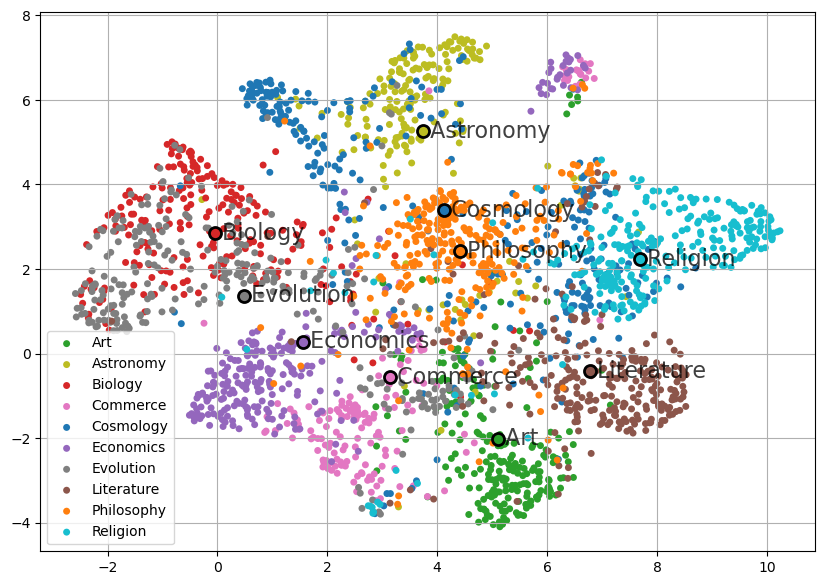

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
for label in labels:
    x_coords = embedding[known_labels==label, 0]
    y_coords = embedding[known_labels==label, 1]
    x_centroid, y_centroid = x_coords.mean(), y_coords.mean()
    ax.scatter(x_coords, y_coords, c=[colordict[label]], s=25, label=label,
               edgecolors='none')
    ax.scatter([x_centroid], [y_centroid], c=[colordict[label]], s=75, edgecolors='black', lw=2, zorder=5)
    ax.text(x_centroid, y_centroid, ' ' + label, color='black', fontsize=16, alpha=0.75, verticalalignment='center')

ax.legend()
ax.grid(True)

plt.show()

In [ ]:
1 + 1

2